<a href="https://colab.research.google.com/github/sy178sy/sy178sy.github.io/blob/master/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path="/content/drive/My Drive/video"

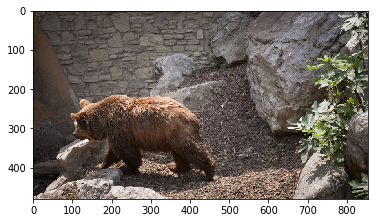

In [0]:
image = plt.imread('/content/drive/My Drive/video/00000.jpg')
image.shape
plt.imshow(image)

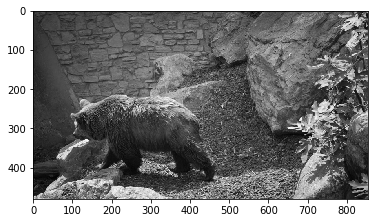

In [0]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

(480, 854, 3)


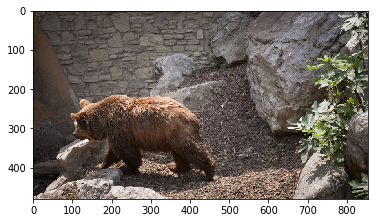

In [0]:
pic = plt.imread("/content/drive/My Drive/video/00000.jpg")/255
# dividing by 255 to bring the pixel values between 0 and 1

print(pic.shape)
plt.imshow(pic)

(480, 854)

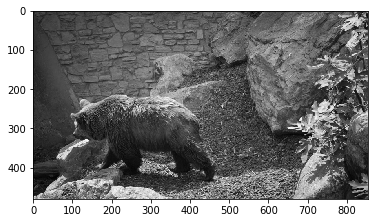

In [0]:
gray = rgb2gray(pic)

plt.imshow(gray, cmap='gray')

#pic_n = gray.reshape(gray.shape[0]*gray.shape[1])
gray.shape

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, random_state=0).fit(gray)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
pic2show

array([[0.13959294, 0.17978902, 0.21312235, ..., 0.53761696, 0.47346167,
        0.47841549],
       [0.13959294, 0.17978902, 0.21312235, ..., 0.53761696, 0.47346167,
        0.47841549],
       [0.13959294, 0.17978902, 0.21312235, ..., 0.53761696, 0.47346167,
        0.47841549],
       ...,
       [0.68951765, 0.73630863, 0.73409137, ..., 0.27338667, 0.25770039,
        0.23809255],
       [0.70463843, 0.78560745, 0.80411412, ..., 0.26105647, 0.2571349 ,
        0.24929176],
       [0.76120706, 0.76794902, 0.72176118, ..., 0.26329647, 0.27085686,
        0.27085686]])

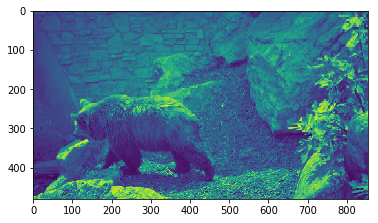

In [0]:
cluster_pic = pic2show.reshape(gray.shape[0], gray.shape[1])
plt.imshow(cluster_pic)

ModeResult(mode=array([1.]), count=array([217474]))

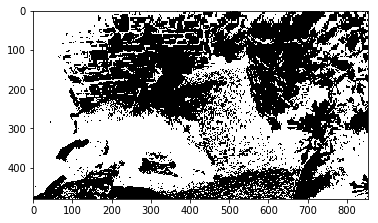

In [0]:
from scipy import stats

gray_r = cluster_pic.reshape(cluster_pic.shape[0]*cluster_pic.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > 0.34 :
        gray_r[i]= 0
    else:
        gray_r[i] = 1
cluster_pic = gray_r.reshape(cluster_pic.shape[0],cluster_pic.shape[1])
plt.imshow(cluster_pic ,cmap='gray')

stats.mode(gray_r)

In [0]:
!unzip 'drive/My Drive/video.zip'

Archive:  drive/My Drive/video.zip
   creating: video/
   creating: video/video/
  inflating: video/video/00000.jpg   
  inflating: video/video/00001.jpg   
  inflating: video/video/00002.jpg   
  inflating: video/video/00003.jpg   
  inflating: video/video/00004.jpg   
  inflating: video/video/00005.jpg   
  inflating: video/video/00006.jpg   
  inflating: video/video/00007.jpg   
  inflating: video/video/00008.jpg   
  inflating: video/video/00009.jpg   
  inflating: video/video/00010.jpg   
  inflating: video/video/00011.jpg   
  inflating: video/video/00012.jpg   
  inflating: video/video/00013.jpg   
  inflating: video/video/00014.jpg   
  inflating: video/video/00015.jpg   
  inflating: video/video/00016.jpg   
  inflating: video/video/00017.jpg   
  inflating: video/video/00018.jpg   
  inflating: video/video/00019.jpg   
  inflating: video/video/00020.jpg   
  inflating: video/video/00021.jpg   
  inflating: video/video/00022.jpg   
  inflating: video/video/00023.jpg   
  infla

In [0]:
import os
def img_distribute(img_feature):
    km = KMeans(n_clusters=2)
    km.fit(img_feature)
    return km

images_km = list(map(img_distribute,images_features))
images_seg = list(map(lambda x: x.labels_.reshape(shape_0,shape_1), images_km))
images_seg_cluster = list(map(lambda x,y: x.cluster_centers_[np.argmax(np.unique(y,return_counts=True)[1])] , images_km,images_seg))

show_binary_images(images_seg)

In [0]:
final_cluster = KMeans(n_clusters=7).fit(images_seg_cluster)

In [0]:
final_cluster.labels_

In [0]:
# image labels

image_labels = [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,1,1,1,5,5,5,5,5,5,5,5,5,0,0,0,0,0,0,3,3,3,3,3,3,3,6,6,6,6,6,6,2,2,2,2,2,2,2,5,5,5,5]

In [0]:
print('Adjusted Rand Score',ars(img_labels,final_cluster.labels_))
print('Rand Index',rand_index(img_labels,final_cluster.labels_))